In [1]:
import os
import statistics
import matplotlib.pyplot as plt
from Bio import AlignIO
import pandas as pd

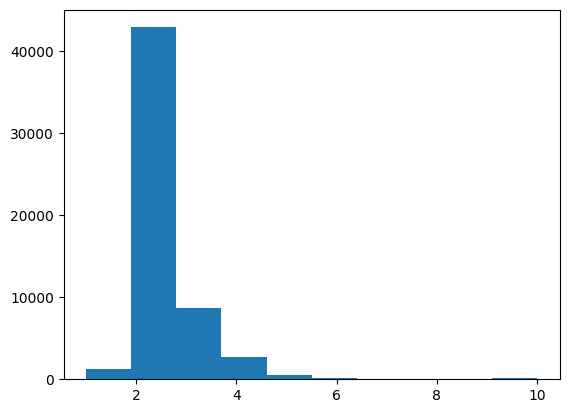

In [2]:
states = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "!", "\"", "#", "$", "%", "&", "'", "(", ")", "*", "+",
",", "/", ":", ";", "<", "=", ">", "@", "[", "\\", "]", "^", "_", "{", "|", "}", "~"]
idx_for_state = {}
for i, state in enumerate(states):
    idx_for_state[state] = i

def analyze(align):
    c_count = len(align[0].seq)
    column_maxima = [0 for _ in range(c_count)]
    for record in align:
        sequence = record.seq
        for c in range(c_count):
            if(len(sequence) == c_count):
                value = sequence[c]
            else:
                value = sequence[c]['d'][0]
            if value == '-' or value == '?':
                continue
            column_maxima[c] = max(idx_for_state[value], column_maxima[c])
    state_sizes = [val + 1 for val in column_maxima]
    return state_sizes
    #plt.hist(state_sizes)
    #plt.show()
    #print(int(statistics.median(state_sizes)))
    #print(sum(column_maxima) / len(column_maxima))
    
    
    
def analyze_morph():
    input_dir = "morph_alignments/multi/"
    state_sizes = []
    with os.scandir(input_dir) as it:
        for entry in it:
            if not entry.is_file():
                continue
            align = AlignIO.read(os.path.join(input_dir, entry.name), "phylip-relaxed")
            state_sizes += analyze(align)
    plt.hist(state_sizes)
    plt.show()

analyze_morph()